<a href="https://colab.research.google.com/github/VENKATAPATHY376/Data_Visualisation_PYTHON/blob/main/Netfilx_DA_Visulalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
import pandas as pd

# Try loading dataset
try:
    df = pd.read_csv("netflix_titles.csv")
    print("✅ File loaded successfully.")
except FileNotFoundError:
    print("📤 Uploading netflix_titles.csv...")
    uploaded = files.upload()

    if 'netflix_titles.csv' in uploaded:
        df = pd.read_csv("netflix_titles.csv")
        print("✅ File uploaded and loaded successfully.")
    else:
        raise FileNotFoundError("❌ Failed to upload file. Please upload netflix_titles.csv manually.")

# Basic Cleaning (applies only if df was successfully loaded)
if 'df' in locals():
    # Clean and process
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
    df['country'] = df['country'].fillna('Unknown')
    df['rating'] = df['rating'].fillna('Not Rated')
    df['director'] = df['director'].fillna('Unknown')
    df['cast'] = df['cast'].fillna('Unknown')
    df['duration'] = df['duration'].fillna('Unknown')

    # 🔹 Show missing values summary
    print("\n🧩 Missing Values Summary:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    # 🔹 Describe numeric columns
    print("\n📊 Numeric Data Summary:")
    display(df.describe())

    # 🔹 Describe categorical columns separately
    print("\n🔤 Categorical Data Summary:")
    display(df.describe(include=['object']))

else:
    print("❌ DataFrame not loaded. Please upload the file and re-run the cell.")


✅ File loaded successfully.

🧩 Missing Values Summary:
date_added    98
year_added    98
dtype: int64

📊 Numeric Data Summary:


,date_added,release_year,year_added
count,8709,8807.000000,8709.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,2018.887932
min,2008-01-01 00:00:00,1925.000000,2008.000000
25%,2018-04-20 00:00:00,2013.000000,2018.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000
std,NaN,8.819312,1.567961



🔤 Categorical Data Summary:


,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,18,221,514,8775
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,3207,1793,362,4


### SECTION A: Basic Charts with Matplotlib

**A.1 Bar Chart – Count of Titles by Type (Movie / TV Show)**

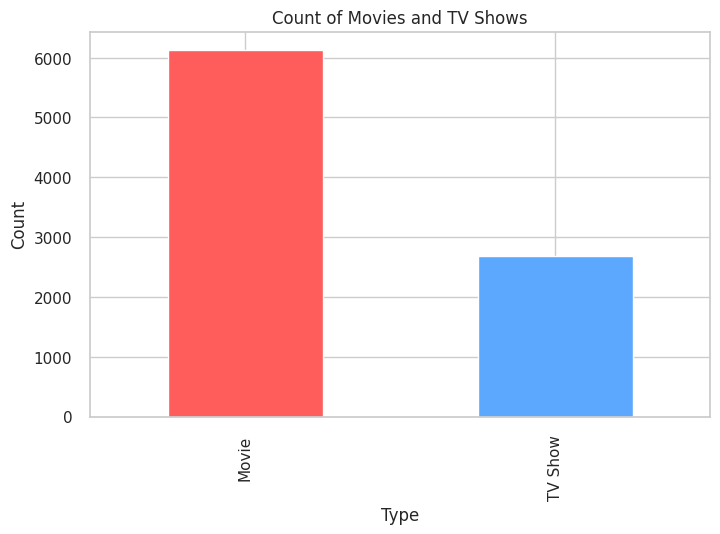

In [7]:
# A.1 Bar Chart – Count of Titles by Type (Movie / TV Show)
plt.figure(figsize=(8,5))
df['type'].value_counts().plot(kind='bar', color=['#FF5C5C', '#5CA8FF'])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**A.2 Histogram – Distribution of Release Years**

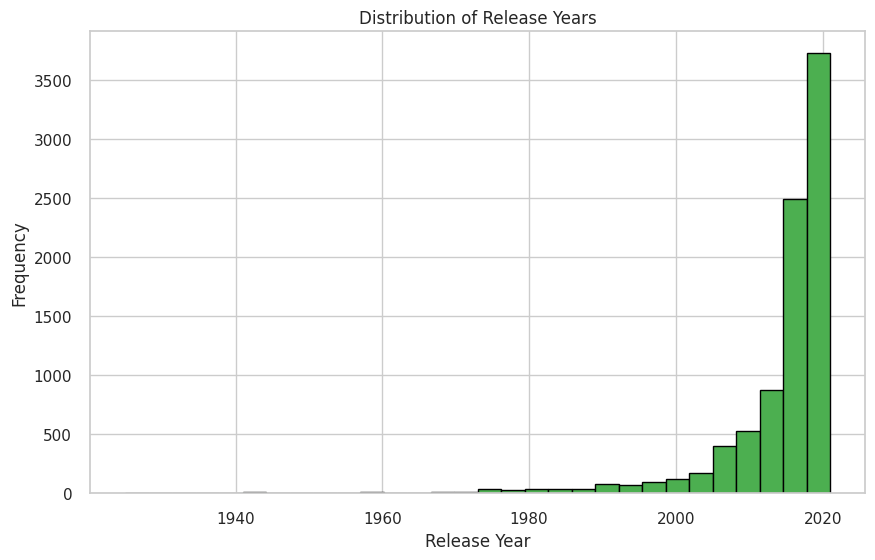

In [8]:
# A.2 Histogram – Distribution of Release Years
plt.figure(figsize=(10,6))
plt.hist(df['release_year'], bins=30, color='#4CAF50', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**A.3 Line Chart – Titles Added Over Time**

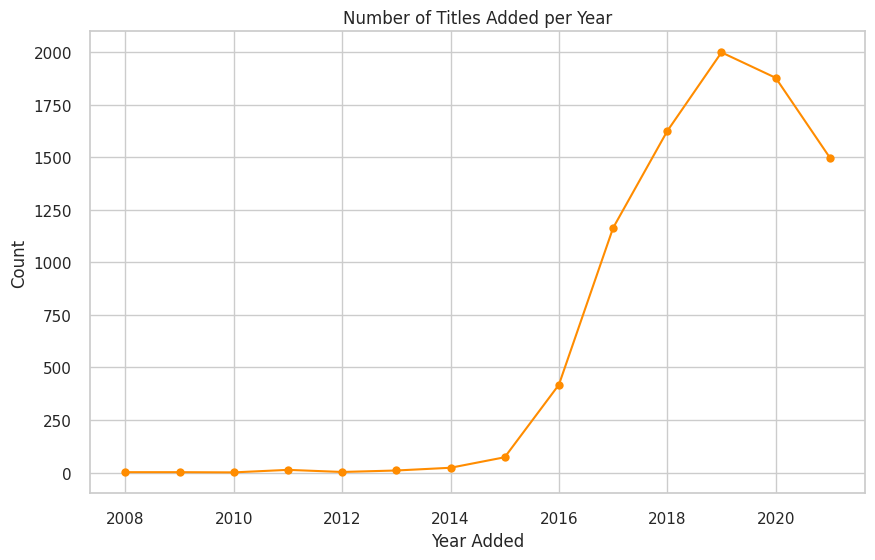

In [9]:
# A.3 Line Chart – Titles Added Over Time
added_by_year = df['date_added'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(added_by_year.index, added_by_year.values, marker='o', color='#FF8C00')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Let's create a distribution plot for movie duration using the `duration_min` column from the `movies` DataFrame.

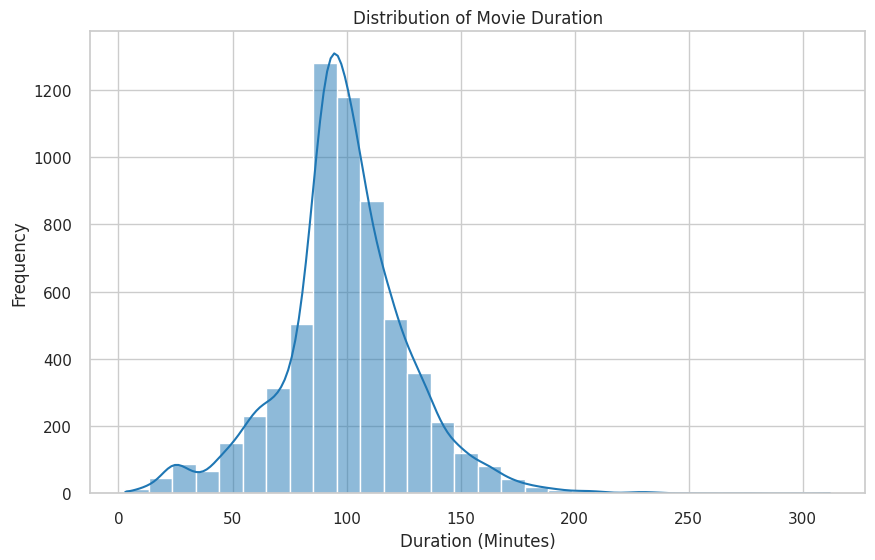

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['duration_min'], bins=30, kde=True, color='#1f77b4')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

### SECTION B: Seaborn – Categorical Plots

**B.1 Boxplot – Duration Distribution (Movies Only)**

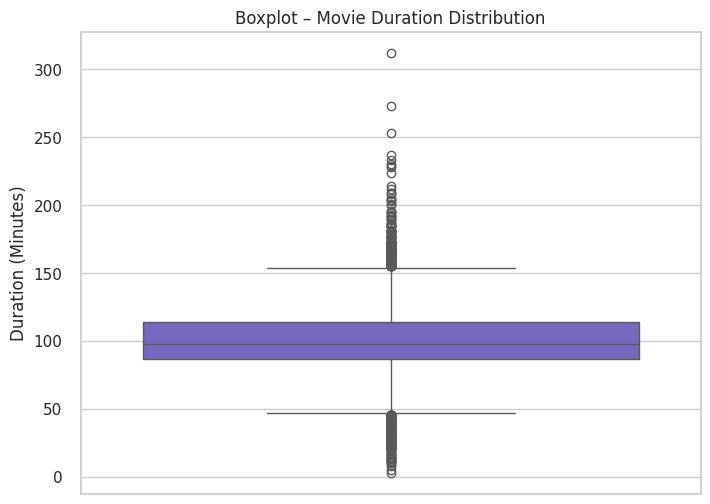

In [10]:
# B.1 Boxplot – Duration Distribution (Movies Only)
movies = df[df['type'] == 'Movie'].copy()
# Extract duration in minutes
movies['duration_min'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

plt.figure(figsize=(8,6))
sns.boxplot(y=movies['duration_min'], color='#6A5ACD')
plt.title('Boxplot – Movie Duration Distribution')
plt.ylabel('Duration (Minutes)')
plt.show()

**B.2 Violin Plot – Movie Duration Distribution by Rating**

/tmp/ipython-input-679067940.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




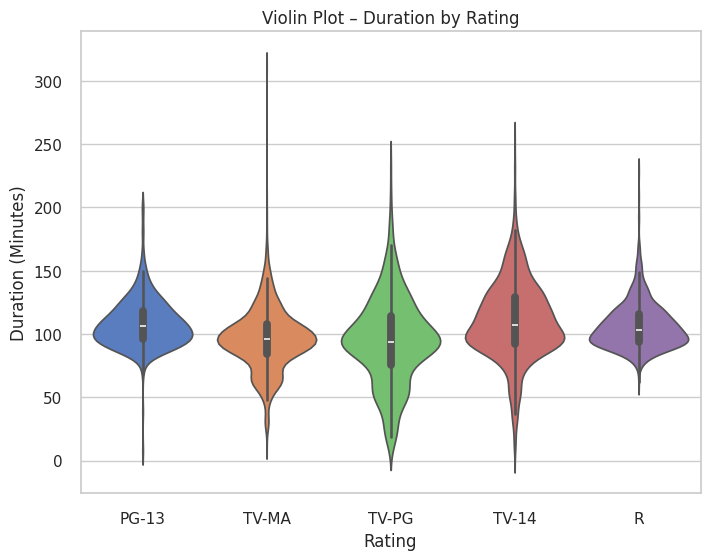

In [11]:
# B.2 Violin Plot – Movie Duration Distribution by Rating
movies = df[df['type'] == 'Movie'].copy() # Ensure 'movies' df is available
movies['duration_min'] = movies['duration'].str.replace(' min', '', regex=False).astype(float) # Ensure 'duration_min' is available

top_ratings = movies['rating'].value_counts().nlargest(5).index
plt.figure(figsize=(8,6)) # Add figure for better control
sns.violinplot(x='rating', y='duration_min', data=movies[movies['rating'].isin(top_ratings)],
               palette='muted')
plt.title('Violin Plot – Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (Minutes)')
plt.show()

**B.3 Count Plot – Top 10 Countries by Number of Titles**

/tmp/ipython-input-169878610.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




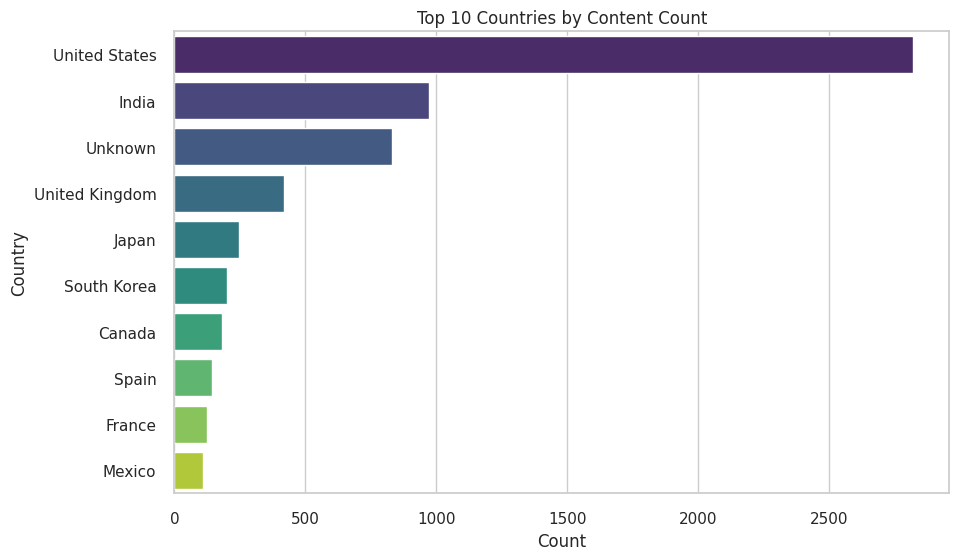

In [12]:
# B.3 Count Plot – Top 10 Countries by Number of Titles
plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().nlargest(10)
sns.countplot(y='country', order=top_countries.index, data=df,
              palette='viridis')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### SECTION C: Interactive Visualizations with Plotly

**C.1 Interactive Scatter Plot – Release Year vs Duration**

In [13]:
# C.1 Interactive Scatter Plot – Release Year vs Duration
movies = df[df['type'] == 'Movie'].copy() # Ensure 'movies' df is available
movies['duration_min'] = movies['duration'].str.replace(' min', '', regex=False).astype(float) # Ensure 'duration_min' is available

fig = px.scatter(movies, x='release_year', y='duration_min', color='rating',
                 title='Interactive Scatter Plot: Release Year vs Duration',
                 labels={'release_year': 'Release Year', 'duration_min': 'Duration (min)'},
                 hover_data=['title'])
fig.show()

**C.2 Interactive Histogram – Number of Titles per Year Added**

In [14]:
# C.2 Interactive Histogram – Number of Titles per Year Added
fig = px.histogram(df, x=df['date_added'].dt.year,
                   title='Interactive Histogram: Titles Added Over the Years',
                   nbins=20, color='type')
fig.update_layout(xaxis_title='Year Added', yaxis_title='Count')
fig.show()

### SECTION D: Insights Summary

In [15]:
# SECTION D: Insights Summary
print("""
INSIGHTS:
1. Movies outnumber TV Shows on Netflix.
2. Content additions peaked between 2018–2020.
3. Most movies have durations between 80–120 minutes.
4. The United States and India dominate Netflix's content library.
5. Interactive visuals allow dynamic exploration of trends by year, duration, and type.
""")


INSIGHTS:
1. Movies outnumber TV Shows on Netflix.
2. Content additions peaked between 2018–2020.
3. Most movies have durations between 80–120 minutes.
4. The United States and India dominate Netflix's content library.
5. Interactive visuals allow dynamic exploration of trends by year, duration, and type.

